## Observations and Insights 

In [60]:
# Dependencies and Setup--------------------------------------------------------

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files---------------------------------------------------------------

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results--------------------------------------

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset------------------------------------------

mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview----------------------------------------------

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [61]:
# Checking the number of mice------------------------------------------------------

print(f"Number of Unique Mice: {mouse_study['Mouse ID'].nunique()}")
print(f"Row Count Based on Mice ID: {len(mouse_study.index)}")

Number of Unique Mice: 249
Row Count Based on Mice ID: 1893


In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint--
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_search = pd.DataFrame(mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep=False)])
duplicate_search

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID-------------

clean_mouse_study = pd.DataFrame(mouse_study.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep = False, inplace = False))
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [64]:
# Checking the number of mice in the clean DataFrame------------------------------

print(f"Number of Unique Mice: {clean_mouse_study['Mouse ID'].nunique()}")
print(f"Row Count Based on Mice ID: {len(clean_mouse_study.index)}")
print(f"Dropped {(len(mouse_study.index))-(len(clean_mouse_study.index))} rows of duplicate data. Nice!")

Number of Unique Mice: 249
Row Count Based on Mice ID: 1883
Dropped 10 rows of duplicate data. Nice!


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Pt. 1 - Create df's for each central tendancy 

mean = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())

median = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())

variance = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())

stdev = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Pt. 2 - Merge df's and rename

sum_mean_median = pd.merge(mean, median, how ='outer', on='Drug Regimen')

sum_var_stdev = pd.merge(variance, stdev, how ='outer', on='Drug Regimen')

summary = pd.merge(sum_mean_median, sum_var_stdev, how ='outer', on='Drug Regimen')
summary.columns = ['Tumor Volume Mean', 'Tumor Volume Median', 'Tumor Volume Variance', 'Tumor Volume Deviation']
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.458254,50.854632,44.053659,6.637293
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

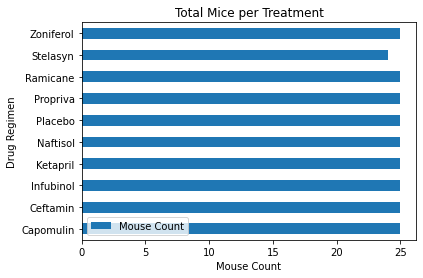

<Figure size 432x288 with 0 Axes>

In [144]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_total_pd = clean_mouse_study.groupby(["Drug Regimen"]).nunique()
bar_total_pd = bar_total_pd.drop(['Timepoint',
                                  'Tumor Volume (mm3)',
                                  'Drug Regimen', 
                                  'Metastatic Sites',
                                  'Age_months',
                                  'Weight (g)',
                                  'Sex'], 1)

bar_total_pd.columns = ['Mouse Count']
bar_total_pd.plot(kind="barh")

# Set a title for the chart
plt.title("Total Mice per Treatment")
plt.xlabel('Mouse Count')
plt.ylabel('Drug Regimen')
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

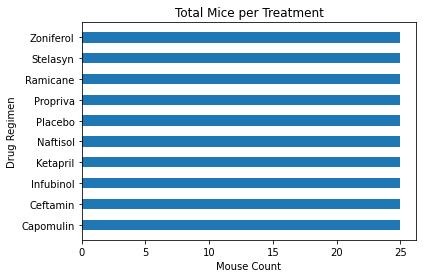

In [170]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

bar_total_py = clean_mouse_study.groupby(["Drug Regimen"]).nunique()
bar_total_py = bar_total_py.drop(['Timepoint',
                                  'Tumor Volume (mm3)',
                                  'Drug Regimen', 
                                  'Metastatic Sites',
                                  'Age_months',
                                  'Weight (g)',
                                  'Sex'], 1)


bar_total_py = bar_total_py.reset_index(drop=False)

plt.barh(bar_total_py['Drug Regimen'], height=.5, width = 25)

# Set a title for the chart
plt.title("Total Mice per Treatment")
plt.xlabel('Mouse Count')
plt.ylabel('Drug Regimen')
plt.show()


#Currently broken - Fix me!

,Mouse ID
Sex,
Female,124
Male,125


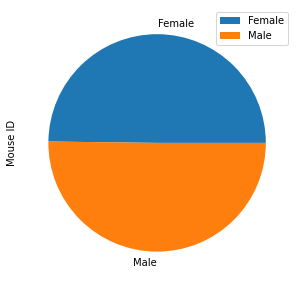

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_study.groupby(["Sex"]).nunique()
gender_count = gender_count.drop(['Timepoint',
                                 'Tumor Volume (mm3)',
                                  'Drug Regimen', 
                                  'Metastatic Sites',
                                  'Age_months',
                                  'Weight (g)',
                                  'Sex'], 1)


gender_count.plot.pie(y='Mouse ID', figsize=(5, 5))
gender_count

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
